In [ ]:
'''
Preprocessing:

Learning algorithms have certain affinity towrads certain patterns in Data

Most of the ML algos only work on numerical data

Preprocessing refers to the data transformation before feeding it to ML Algo

'''


In [ ]:
'''
Scaling:

It refers to btinging down numerical values into the same range

'''

1. Standard Scaler

    The standard scaler assumes your data is normally distributed within each feature and it would scale them such that the distribution is centred around 0 and std dev is 1


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# generated normally distributed data

data_features = pd.DataFrame({
    'x1': np.random.normal(0,1,1000),
    'x2': np.random.normal(10,5,1000),
    'x3': np.random.normal(50,25,1000)
})
data_features

,x1,x2,x3
0,-0.036725,9.761826,42.848277
1,-0.951952,6.878056,40.822583
2,-1.585791,16.915965,40.038099
3,1.564627,10.402220,53.535425
4,0.983284,6.301682,64.419973
...,...,...,...
995,1.240976,12.353159,99.118343
996,-1.359168,5.636730,84.474762
997,-0.275567,10.901383,59.186023
998,0.868436,5.596167,41.210800


In [3]:
data_features.describe()  # observe middle 50% - 25% to 50%

,x1,x2,x3
count,1000.000000,1000.000000,1000.000000
mean,-0.031192,9.453626,49.722750
std,0.954206,5.075896,24.314646
min,-3.536231,-5.079044,-26.338272
25%,-0.656132,6.179603,33.167162
50%,-0.031141,9.471534,50.067686
75%,0.631225,12.644862,65.597804
max,2.781645,26.081922,122.487457


<AxesSubplot:ylabel='Density'>

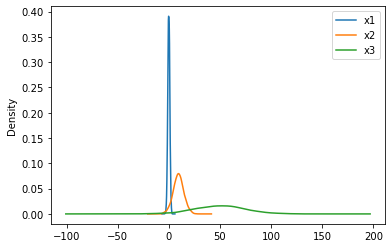

In [11]:
data_features.plot.kde()

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

standard_scaler = StandardScaler()

data_tf = standard_scaler.fit_transform(data_features)

In [7]:
type(data_tf)

numpy.ndarray

In [8]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df

,x1,x2,x3
0,-0.005802,0.060749,-0.282871
1,-0.965432,-0.507666,-0.366225
2,-1.630022,1.470888,-0.398505
3,1.673242,0.186976,0.156884
4,1.063694,-0.621274,0.604762
...,...,...,...
995,1.333889,0.571521,2.032532
996,-1.392405,-0.752341,1.429978
997,-0.256231,0.285365,0.389395
998,0.943274,-0.760337,-0.350250


In [9]:
df.describe()  # observe middle 50% - 25% to 50%

,x1,x2,x3
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,-3.175238e-17,6.483702e-17,2.615685e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.675090e+00,-2.864508e+00,-3.129763e+00
25%,-6.552595e-01,-6.453366e-01,-6.812303e-01
50%,5.381388e-05,3.529849e-03,1.419343e-02
75%,6.945552e-01,6.290186e-01,6.532275e-01
max,2.949306e+00,3.277573e+00,2.994126e+00


<AxesSubplot:ylabel='Density'>

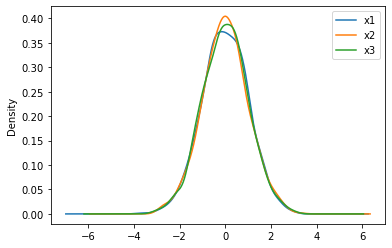

In [10]:
df.plot.kde()

In [ ]:
# The standard scaler shouldn't be used if your data distribution is not normal

'''
2. MinMax Scaler:

One of the most popular scaling techniques

Data shifts from 0 to 1

'''

In [13]:
data_feature = pd.DataFrame({
    'x1': np.random.chisquare(8,1000),
    'x2': np.random.beta(8,2,1000) * 40,
    'x3': np.random.normal(50,3,1000) 
})

<AxesSubplot:ylabel='Density'>

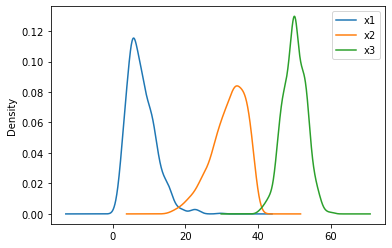

In [14]:
data_feature.plot.kde()

In [15]:
data_feature.describe()   # observe middle 50% - 25% to 50%

,x1,x2,x3
count,1000.000000,1000.000000,1000.000000
mean,7.963756,31.952006,50.007598
std,3.896738,4.745517,3.169828
min,1.286817,15.791196,40.110748
25%,5.169436,29.024439,47.833697
50%,7.295854,32.667799,50.047694
75%,10.255098,35.761538,52.262787
max,29.676374,39.741713,60.619959


In [16]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(data_feature)
print(data_tf)

[[0.14710647 0.81839365 0.24078891]
 [0.39999123 0.87862125 0.51065805]
 [0.57930827 0.42816253 0.35971019]
 ...
 [0.18130443 0.8699976  0.514277  ]
 [0.44391154 0.76554418 0.25503531]
 [0.10053426 0.75321065 0.33772786]]


In [17]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.describe()   # observe middle 50% - 25% to 50%

,x1,x2,x3
count,1000.000000,1000.000000,1000.000000
mean,0.235190,0.674758,0.482556
std,0.137260,0.198138,0.154556
min,0.000000,0.000000,0.000000
25%,0.136762,0.552524,0.376560
50%,0.211664,0.704645,0.484511
75%,0.315901,0.833817,0.592516
max,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

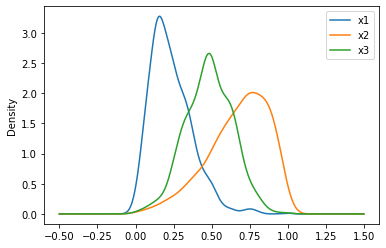

In [18]:
df.plot.kde()

In [ ]:
# minmax scaler gets affected due to outliers

3. Robust Scaler:
    This utilizes the idea of IQR Technique and is not affeted by outliers

In [19]:
data_feature = pd.DataFrame({'x1': np.concatenate([np.random.normal(25,1,1000), np.random.normal(1,2,25)]),
                             'x2': np.concatenate([np.random.chisquare(10,1000), np.random.normal(75,1,25)])
                            })
data_feature

,x1,x2
0,23.258135,9.277959
1,25.392162,5.077272
2,25.697581,9.287953
3,25.946580,8.886297
4,25.020186,8.396350
...,...,...
1020,2.942680,75.080800
1021,-0.750273,74.435785
1022,4.010501,75.622236
1023,-1.025755,76.083037


In [20]:
data_feature.describe()

,x1,x2
count,1025.000000,1025.000000
mean,24.471879,11.391009
std,3.845876,11.006705
min,-1.854478,0.964039
25%,24.296735,6.795986
50%,25.020103,9.319121
75%,25.711722,12.476843
max,28.419491,77.253255


<AxesSubplot:ylabel='Density'>

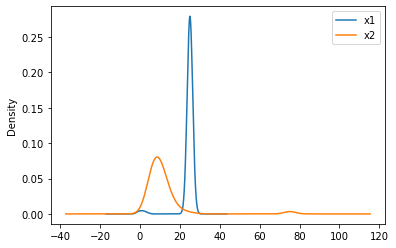

In [21]:
data_feature.plot.kde()

In [22]:
robustscaler = RobustScaler()
data_tf = robustscaler.fit_transform(data_feature)

print(data_tf)

[[-1.24521852e+00 -7.24568977e-03]
 [ 2.62942069e-01 -7.46691560e-01]
 [ 4.78787338e-01 -5.48642720e-03]
 ...
 [-1.48479119e+01  1.16713214e+01]
 [-1.84071357e+01  1.17524361e+01]
 [-1.72028937e+01  1.13264759e+01]]


In [23]:
df = pd.DataFrame(data_tf, columns = ['x1','x2'])
df

,x1,x2
0,-1.245219,-0.007246
1,0.262942,-0.746692
2,0.478787,-0.005486
3,0.654760,-0.076190
4,0.000059,-0.162435
...,...,...
1020,-15.602563,11.576012
1021,-18.212447,11.462471
1022,-14.847912,11.671321
1023,-18.407136,11.752436


In [24]:
df.describe()

,x1,x2
count,1025.000000,1025.000000
mean,-0.387441,0.364714
std,2.717959,1.937508
min,-18.992811,-1.470743
25%,-0.511218,-0.444147
50%,0.000000,0.000000
75%,0.488782,0.555853
max,2.402417,11.958429


<AxesSubplot:ylabel='Density'>

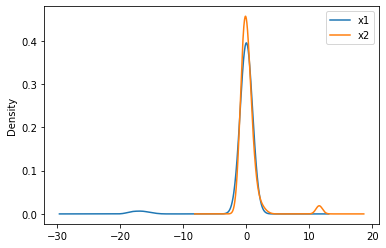

In [25]:
df.plot.kde()

In [38]:
#  Binarization:

X = np.array([[1, 2.5, 3.9],
             [2, 0, 1],
             [0, -3, 5]])
print(X)

from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=1.0)

[[ 1.   2.5  3.9]
 [ 2.   0.   1. ]
 [ 0.  -3.   5. ]]


In [39]:
data_tf = binarizer.fit_transform(X)

print(data_tf)  # values > 1 are coverted to 1 and < = 1converted to 0

[[0. 1. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
# Encoding Categorical Values

# Ordinals - Where we have mathematical relationship between variables
# we use label encoding in this case

In [43]:
df = pd.DataFrame({'Age':[33, 32, 45, 29, 55, 22, 27],
                   'Income':['Low','Medium','High','Low', 'Medium', 'Low', 'Low']})
df

,Age,Income
0,33,Low
1,32,Medium
2,45,High
3,29,Low
4,55,Medium
5,22,Low
6,27,Low


In [44]:
df.Income.map({'Low':1, 'Medium':2, 'High':3}) # Label encoding

0    1
1    2
2    3
3    1
4    2
5    1
6    1
Name: Income, dtype: int64

In [46]:
# There is a sklearn transformer for label encoding as well

In [48]:
# Encoding Nominal Values
# These terms are just differet and they don't exactly have a mathematical relationship
# We convert them to one hot vector

df = pd.DataFrame({'Age':[33, 32, 45, 29, 55, 22, 27],
                   'Gender':['Male','Female','Male','LGBTQ', 'Male', 'Female', 'Male']})
df

,Age,Gender
0,33,Male
1,32,Female
2,45,Male
3,29,LGBTQ
4,55,Male
5,22,Female
6,27,Male


In [49]:
df.Gender.unique()

array(['Male', 'Female', 'LGBTQ'], dtype=object)

In [50]:
print(pd.get_dummies(df.Gender))

   Female  LGBTQ  Male
0       0      0     1
1       1      0     0
2       0      0     1
3       0      1     0
4       0      0     1
5       1      0     0
6       0      0     1


In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# label encoder
df = pd.DataFrame({'Age':[33, 32, 45, 29, 55, 22, 27],
                   'Income':['Low','Medium','High','Low', 'Medium', 'Low', 'Low']})
df

,Age,Income
0,33,Low
1,32,Medium
2,45,High
3,29,Low
4,55,Medium
5,22,Low
6,27,Low


In [52]:
label = LabelEncoder()
df['Income_label'] = label.fit_transform(df.Income)  # problem with this is it assigns values on alphabetical order - High - 0, Low -1, Medium - 3
df

,Age,Income,Income_label
0,33,Low,1
1,32,Medium,2
2,45,High,0
3,29,Low,1
4,55,Medium,2
5,22,Low,1
6,27,Low,1


In [ ]:
# one hot encoder needs to represent category
# So, first you have to run label encoder and then One hot encoder

In [53]:
df = pd.DataFrame({'Age':[33, 32, 45, 29, 55, 22, 27],
                   'Gender':['Male','Female','Male','LGBTQ', 'Male', 'Female', 'Male']})
df

,Age,Gender
0,33,Male
1,32,Female
2,45,Male
3,29,LGBTQ
4,55,Male
5,22,Female
6,27,Male


In [54]:
df['gender_tf'] = label.fit_transform(df.Gender)
df

,Age,Gender,gender_tf
0,33,Male,2
1,32,Female,0
2,45,Male,2
3,29,LGBTQ,1
4,55,Male,2
5,22,Female,0
6,27,Male,2


In [55]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
# Imputation

# Missing values can't be processed by Learning algorithms
# Imputers can be used to infer and fill out missing values from existing data

In [56]:
df = pd.DataFrame({'A':[33, 32, 45, 29, 55, 22, 27],
                   'B':[5.3, 5.1, 6.3, np.nan, 5.6, 5.3, 6.1]})
df # you have some missing data here

,A,B
0,33,5.3
1,32,5.1
2,45,6.3
3,29,NaN
4,55,5.6
5,22,5.3
6,27,6.1


In [57]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') # replacing NaN with median

df_copy = imputer.fit_transform(df)
df_copy

array([[33.  ,  5.3 ],
       [32.  ,  5.1 ],
       [45.  ,  6.3 ],
       [29.  ,  5.45],
       [55.  ,  5.6 ],
       [22.  ,  5.3 ],
       [27.  ,  6.1 ]])

In [58]:
# Polynomial features

df = pd.DataFrame({'A':[1, 2, 3, 4 , 5], 'B':[3, 5, 7, 2, 6]})
df

,A,B
0,1,3
1,2,5
2,3,7
3,4,2
4,5,6


In [59]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True) # 1st col - x1, 2nd - A, 3rd -B, 4th - A**2, 5th  - A*B, 6th - B**2 

poly.fit_transform(df)

array([[ 1.,  1.,  3.,  1.,  3.,  9.],
       [ 1.,  2.,  5.,  4., 10., 25.],
       [ 1.,  3.,  7.,  9., 21., 49.],
       [ 1.,  4.,  2., 16.,  8.,  4.],
       [ 1.,  5.,  6., 25., 30., 36.]])

In [61]:
poly = PolynomialFeatures(degree=3, include_bias=True) # x1, A, B, A**2, A*B, B**2, A**3, A^2*B, A*B^2, B**3

print(poly.fit_transform(df))

[[  1.   1.   3.   1.   3.   9.   1.   3.   9.  27.]
 [  1.   2.   5.   4.  10.  25.   8.  20.  50. 125.]
 [  1.   3.   7.   9.  21.  49.  27.  63. 147. 343.]
 [  1.   4.   2.  16.   8.   4.  64.  32.  16.   8.]
 [  1.   5.   6.  25.  30.  36. 125. 150. 180. 216.]]
